### Importing initial libraries

In [2]:
import investpy as inv
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (16, 8)
import pandas as pd
%config Completer.use_jedi = False # this speeds up autocomplete

### Initial search from Banco Central

In [67]:
'''
Code from: https://www.youtube.com/watch?v=7rFsu48oBn8&list=PLCAhGm8nJ9CBn51o0x3j1p1LuMRqpeqCy
I added the arguments 'data_inicio' and 'data_final' to help filtering the data.
''' 

# Creating scraping code
def consulta_bc(codigo_bcb, data_inicio = '2014-01-01', data_final = '2021-01-01'):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  df = pd.read_json(url)
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  df = df[df.index >= data_inicio]
  return df[df.index < data_final]

### Downloading data

#### Indexes and national interest fees

In [118]:
# Inflation index
ipca = consulta_bc(433)

In [69]:
# Civil construction index
incc = consulta_bc(7462)

In [90]:
# CDI - Interbank deposit credit monthly
cdi = consulta_bc(4391)

In [71]:
# Vacancy index
desocup = consulta_bc(24369)

In [72]:
# Commodities energy index
energia_index_commodity = consulta_bc(27577)

#### Civil construction

In [73]:
# Index of expenditures in civil construction
index_insumos_da_constr_civil = consulta_bc(21868)

In [74]:
# Expenditures in civil construction
insumos_da_constr_civil = consulta_bc(22761)

In [75]:
# Credit operations in civil construction
op_de_credito_na_contr_civil = consulta_bc(22030)

In [76]:
# Index of formal employment in civil construction
empregos_construcao_civil = consulta_bc(25255)

In [77]:
# Expenditures in construction materials
gastos_materiais_construcao = consulta_bc(28484)

#### Energy indices

In [79]:
# Comercial energy consumption in GWh
consumo_energia_comercial = consulta_bc(1402)

In [80]:
# Residential energy consumption in GWh
consumo_energia_residencial = consulta_bc(1403)

In [81]:
# Industrial energy consumption in GWh
consumo_energia_industrial = consulta_bc(1404)

In [82]:
# Others energy consumption in GWh
consumo_energia_outros = consulta_bc(1405)

In [83]:
# Total energy consumption in GWh
consumo_energia_total = consulta_bc(1406)

### Joining data

In [138]:
interest_data = pd.DataFrame()

# Indexes and national interest fees
interest_data['ipca'] = ipca['valor']
interest_data['incc'] = incc['valor']
interest_data['cdi'] = cdi['valor']
interest_data['desocup'] = desocup['valor']
interest_data['energia_index_commodity'] = energia_index_commodity['valor']

# Civil construction
interest_data['index_insumos_da_constr_civil'] = index_insumos_da_constr_civil['valor']
interest_data['insumos_da_constr_civil'] = insumos_da_constr_civil['valor']
interest_data['op_de_credito_na_contr_civil'] = op_de_credito_na_contr_civil['valor']
interest_data['empregos_construcao_civil'] = empregos_construcao_civil['valor']
interest_data['gastos_materiais_construcao'] = gastos_materiais_construcao['valor']

# Energy indices
interest_data['consumo_energia_comercial'] = consumo_energia_comercial['valor']
interest_data['consumo_energia_residencial'] = consumo_energia_residencial['valor']
interest_data['consumo_energia_industrial'] = consumo_energia_industrial['valor']
interest_data['consumo_energia_outros'] = consumo_energia_outros['valor']
interest_data['consumo_energia_total'] = consumo_energia_total['valor']

In [139]:
interest_data

,ipca,incc,cdi,desocup,energia_index_commodity,index_insumos_da_constr_civil,insumos_da_constr_civil,op_de_credito_na_contr_civil,empregos_construcao_civil,gastos_materiais_construcao,consumo_energia_comercial,consumo_energia_residencial,consumo_energia_industrial,consumo_energia_outros,consumo_energia_total
data,,,,,,,,,,,,,,,
2014-01-01,0.55,0.54,0.84,6.4,83.66,92.2,0.0,108183,254.31,101.4,7745.0,11798.0,14537.0,6471.0,40551.0
2014-02-01,0.69,0.62,0.78,6.7,85.28,93.2,36.6,109148,256.93,105.3,8204.0,11879.0,15107.0,6753.0,41944.0
2014-03-01,0.92,0.57,0.76,7.2,81.71,96.8,40.5,110389,257.05,101.5,7744.0,11289.0,15079.0,6386.0,40498.0
2014-04-01,0.67,0.77,0.82,7.1,79.89,94.0,24.4,112023,257.72,100.3,7588.0,10780.0,15260.0,6163.0,39792.0
2014-05-01,0.46,0.57,0.86,7.0,78.96,98.0,41.0,113985,258.24,100.8,7304.0,10877.0,14943.0,6168.0,39291.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,0.24,1.42,0.16,14.4,109.12,82.7,-0.9,71749,NaN,119.4,6259.0,11852.0,14517.0,6495.0,39122.0
2020-09-01,0.64,2.50,0.16,14.6,106.04,84.1,0.2,73514,NaN,122.3,6667.0,12241.0,14652.0,6668.0,40227.0
2020-10-01,0.86,3.39,0.16,14.3,113.71,88.0,0.6,74361,NaN,118.4,7286.0,13084.0,15109.0,6947.0,42426.0


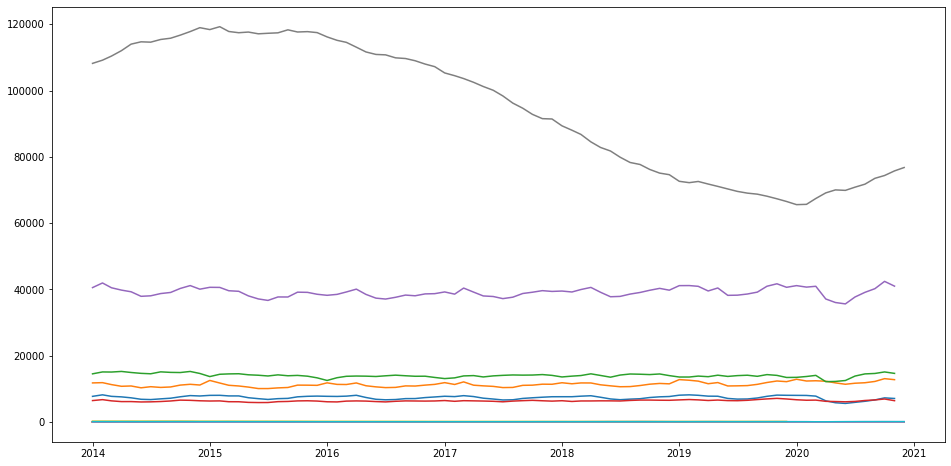

In [140]:
plt.plot(interest_data)
plt.show()